In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
print(1)

1


In [3]:
df=pd.read_csv(r"A:\Work Docs\DATA Set\titanic_train.csv",usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
print(f"Mean of Age is: {df['Age'].mean()}")
print(f"Median of Age is: {df['Age'].median()}")
print(f"Mode of Age is: {df['Age'].mode()}")


Mean of Age is: 29.69911764705882
Median of Age is: 29.69911764705882
Mode of Age is: 0    29.699118
Name: Age, dtype: float64


In [9]:
x=df.iloc[:,1:3]
x.head(5)

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [10]:
y=df.drop(columns=['Age','Fare'])
y.head(5)

,Survived
0,0
1,1
2,1
3,1
4,0


In [11]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\acz\AppData\Local\Temp\ipykernel_10920\2971315091.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=x_train['Age'])


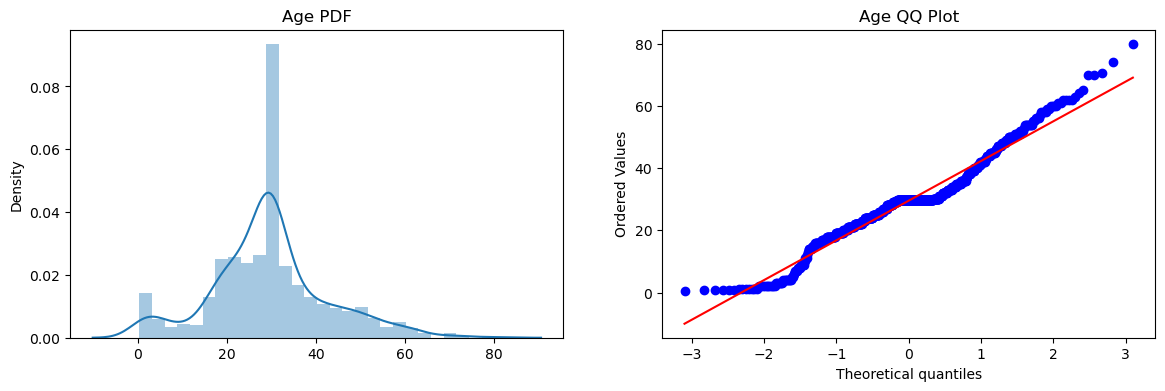

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x=x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')
plt.show()




C:\Users\acz\AppData\Local\Temp\ipykernel_10920\3313795166.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


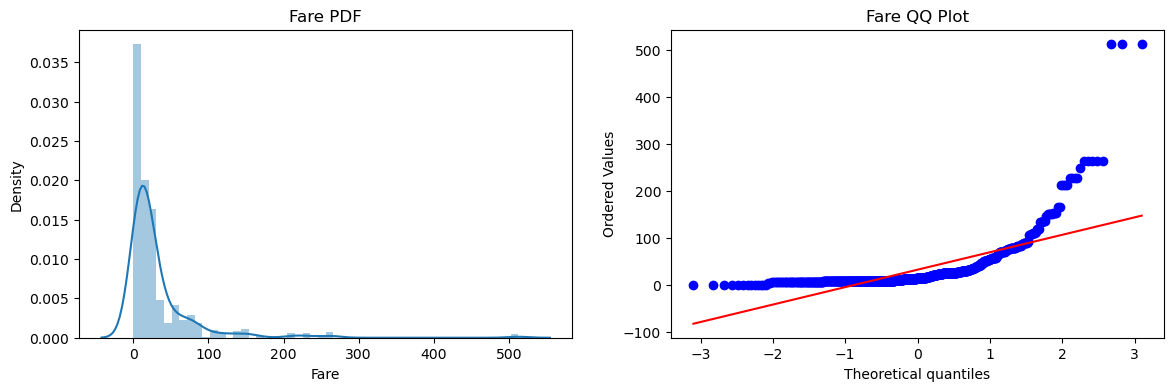

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [14]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [15]:
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)

y_pred1=clf1.predict(x_test)
y_pred2=clf2.predict(x_test)

print(f'Accuracy of LR is: {accuracy_score(y_test,y_pred1)}')
print(f'Accuracy of LR is: {accuracy_score(y_test,y_pred2)}')

Accuracy of LR is: 0.6480446927374302
Accuracy of LR is: 0.6983240223463687


c:\Users\acz\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Applying Function transformer

In [17]:
trf=FunctionTransformer(func=np.log1p)

In [18]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.fit_transform(x_test)

C:\Users\acz\AppData\Local\Temp\ipykernel_10920\614732837.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=x_train_transformed['Age'])


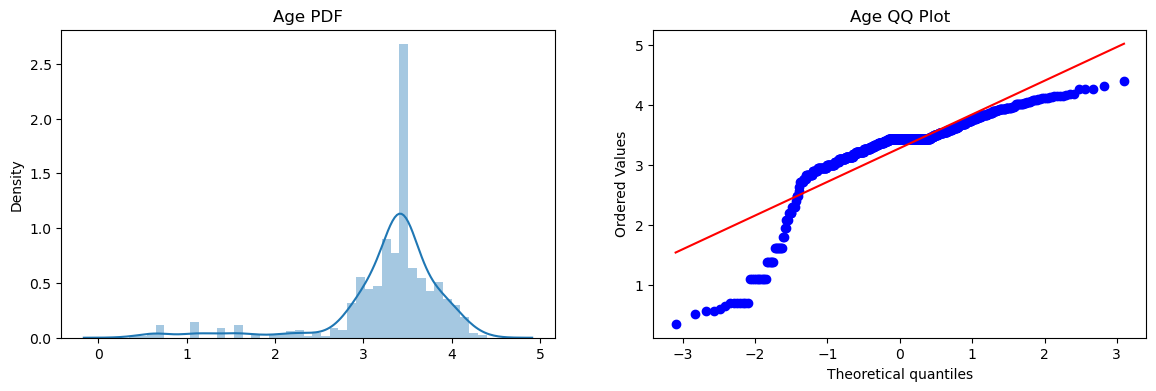

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x=x_train_transformed['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')
plt.show()

C:\Users\acz\AppData\Local\Temp\ipykernel_10920\2687760508.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed['Fare'])


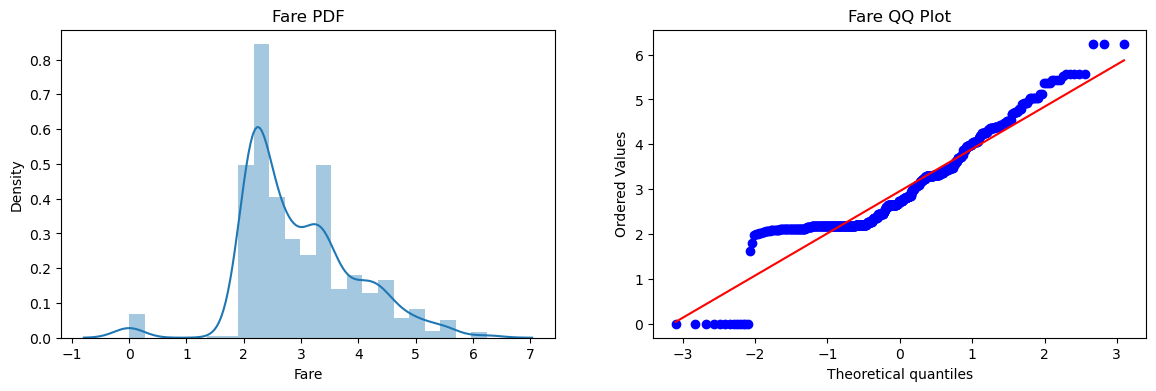

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train_transformed['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [22]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

clf1.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

y_pred1=clf1.predict(x_test_transformed)
y_pred2=clf2.predict(x_test_transformed)

print(f'Accuracy of LR is: {accuracy_score(y_test,y_pred1)}')
print(f'Accuracy of LR is: {accuracy_score(y_test,y_pred2)}')

Accuracy of LR is: 0.6815642458100558
Accuracy of LR is: 0.6871508379888268


c:\Users\acz\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


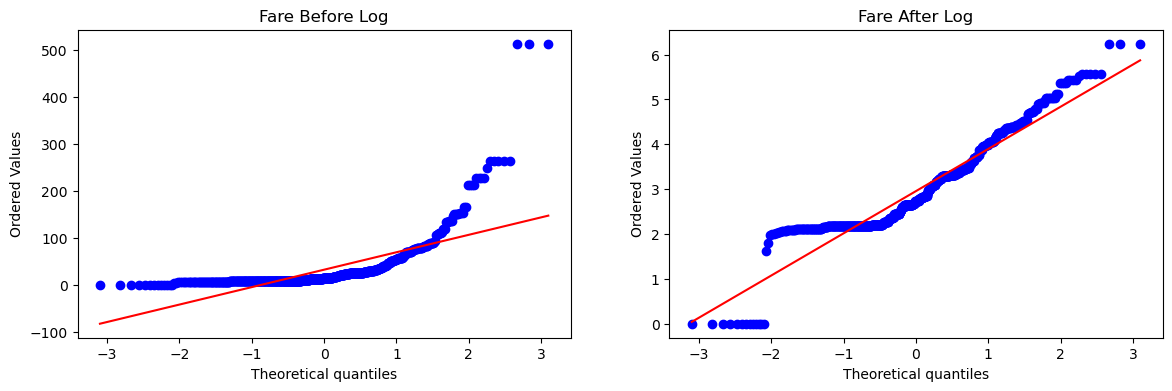

In [24]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

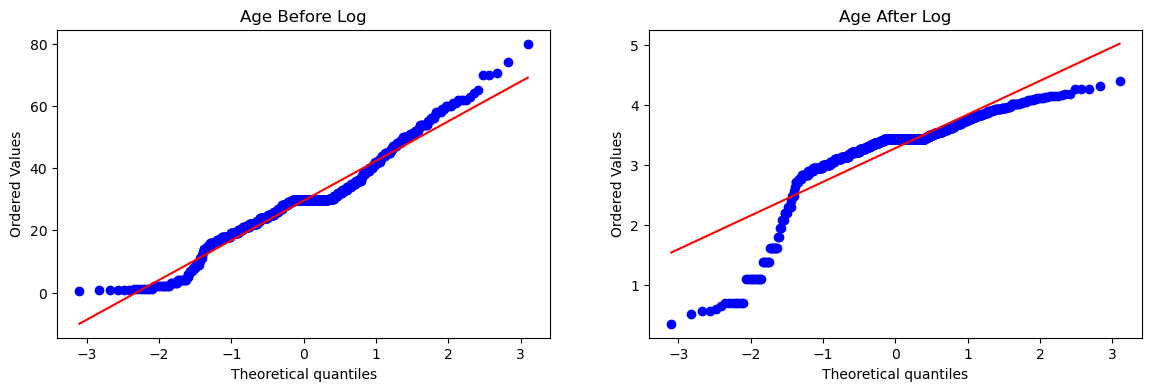

In [26]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()